In [12]:
from importlib import reload
import Game

reload(Game)

<module 'Game' from 'c:\\Users\\admin\\Downloads\\nba\\Game.py'>

In [2]:
from Game import Game
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
import geopandas as gpd
import movingpandas as mpd
import geoviews
import shapely as shp
import holoviews as hv
import hvplot.pandas
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
from time import time

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts, dim
from os.path import exists
from urllib.request import urlretrieve

FIELD_LEN = 91.66
FIELD_WIDTH = 49.21

In [3]:
pd.set_option('mode.chained_assignment', 'warn')
warnings.filterwarnings("default")

In [4]:
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings("ignore")

In [5]:
{1,2,3}.intersection({2,3,4})

{2, 3}

In [6]:
import os
folder_path_events = './data/events/'
json_path = './data/sportvu/'
events_files = [f.split('.')[0] for f in os.listdir(folder_path_events) if f.endswith('.csv')]
json_files = [f.split('.')[0] for f in os.listdir(json_path) if f.endswith('.json')]
events_files = list(set(events_files).intersection(set(json_files)))[:25]
game_list = []
for id in tqdm(events_files):
  try:
    game = Game(game_id=id)
    _, _ = game.read_json()
    game_list.append(game)
    
    #game_list = [Game(game_id=id) for id in events_files][:100]
  except:
    print(id)
    pass
#for game in tqdm(game_list):
#  _, _ = game.read_json()

  0%|          | 0/25 [00:00<?, ?it/s]

swap side quater 1
swap side quater 2


  4%|▍         | 1/25 [00:30<12:05, 30.22s/it]

swap side quater 3
swap side quater 4


  8%|▊         | 2/25 [00:49<09:11, 23.98s/it]

swap side quater 3
swap side quater 4


 12%|█▏        | 3/25 [01:16<09:12, 25.13s/it]

swap side quater 3
swap side quater 4


 16%|█▌        | 4/25 [01:37<08:13, 23.49s/it]

swap side quater 3
swap side quater 4


 20%|██        | 5/25 [01:58<07:30, 22.54s/it]

swap side quater 1
swap side quater 2


 24%|██▍       | 6/25 [02:20<07:07, 22.49s/it]

swap side quater 3
swap side quater 4


 28%|██▊       | 7/25 [02:36<06:08, 20.49s/it]

swap side quater 1
swap side quater 2


 32%|███▏      | 8/25 [02:59<05:57, 21.01s/it]

swap side quater 1
swap side quater 2


 40%|████      | 10/25 [03:23<03:54, 15.64s/it]

0021500632
swap side quater 3
swap side quater 4


 44%|████▍     | 11/25 [04:25<06:55, 29.69s/it]

swap side quater 3
swap side quater 4


 48%|████▊     | 12/25 [04:45<05:49, 26.86s/it]

swap side quater 3
swap side quater 4


 52%|█████▏    | 13/25 [05:09<05:10, 25.87s/it]

swap side quater 3
swap side quater 4
swap side quater 5


 56%|█████▌    | 14/25 [06:42<08:29, 46.28s/it]

swap side quater 1
swap side quater 2


 60%|██████    | 15/25 [07:39<08:15, 49.51s/it]

swap side quater 3
swap side quater 4


 64%|██████▍   | 16/25 [08:13<06:41, 44.59s/it]

swap side quater 3
swap side quater 4


 68%|██████▊   | 17/25 [09:27<07:07, 53.42s/it]

swap side quater 3
swap side quater 4


 72%|███████▏  | 18/25 [10:48<07:13, 61.86s/it]

swap side quater 3
swap side quater 4
swap side quater 5


 80%|████████  | 20/25 [11:54<03:42, 44.41s/it]

0021500592
swap side quater 3
swap side quater 4


 84%|████████▍ | 21/25 [12:30<02:48, 42.01s/it]

swap side quater 3
swap side quater 4


 88%|████████▊ | 22/25 [13:20<02:12, 44.28s/it]

swap side quater 3
swap side quater 4


 92%|█████████▏| 23/25 [14:22<01:39, 49.53s/it]

swap side quater 1
swap side quater 2


 96%|█████████▌| 24/25 [14:48<00:42, 42.57s/it]

swap side quater 3
swap side quater 4


100%|██████████| 25/25 [15:38<00:00, 37.54s/it]


In [17]:
#game = Game(game_id="0021500492")
#df, action_df = game.read_json()

In [18]:
#game = game_list[1]

In [7]:
def get_prev_sc_margin(eventnum):
  cur = eventnum
  while cur > 0:
    cur = cur-1
    try:
      curev = game.action_df[game.action_df['EVENTNUM'] == cur]
      if len(curev) == 0:
        continue
      curscstr = curev.iloc[0]['SCOREMARGIN']
      if curscstr == np.nan:
        continue
      return (0 if (curscstr == "TIE") else int(curscstr))
    except:
      pass
  return 0

def get_shot_val(ev):
  prevmargin = get_prev_sc_margin(ev['EVENTNUM'])
  curmargin = 0 if ev['SCOREMARGIN'] == 'TIE' else int(ev['SCOREMARGIN'])
  shotpoints = curmargin - prevmargin
  return abs(shotpoints)

In [8]:
HOME = 0
VISITATOR = 1

def distance_from_basket(x,y,team):
  baskets = {
      0: (5.25, 49.21/2.0),
      1: ((91.86-5.25), 49.21/2.0)
  }
  bx = baskets[team][0]
  by = baskets[team][1]
  return pow(( pow((x-bx), 2.0) + pow((y-by), 2.0) ), 0.5)

def nearest_enemy_dist(moment_id, player_id):
  def get_player_data(pid):
    pdata = game.player_df[game.player_df['player_id'] == pid].iloc[0]
    return pdata
  pdata = get_player_data(player_id)
  team_id = pdata['team_id']
  positions = game.move_df[game.move_df['moment_id'] == moment_id]
  p_pos = positions[positions['object_id'] == player_id].iloc[0]
  px = p_pos['x']
  py = p_pos['y']
  distances = []
  for _, p in positions.iterrows():
    ox = p['x']
    oy = p['y']
    dist = pow( (pow((px-ox), 2.0) + pow((py-oy), 2.0) ) ,0.5)
    distances.append(dist)
  positions = positions.assign(pdist=distances)
  teams = []
  for _, p in positions.iterrows():
    oid = p['object_id']
    if oid == -1:
      teams.append(-1)
      continue
    odata = get_player_data(oid)
    oteam = odata['team_id']
    teams.append(oteam)
  positions = positions.assign(team=teams)
  oposi = positions[np.logical_not(positions['team'].isin([-1, team_id]))]
  closest_oponent = oposi.loc[oposi['pdist'].idxmin()]
  return closest_oponent['pdist']


def reverse_coordinates(df):
    x_symetric = 50
    y_symetric = 25
    df['x'] = 2 * x_symetric - df['x']
    df['y'] = 2 * y_symetric - df['y']
    return df

In [9]:
shot_dfs = []
for game in tqdm(game_list):
  shots = game.get_shot_df()
  shots = shots[shots['EVENTMSGTYPE'].isin([1,2])]

  shots['team'] = shots['PLAYER1_TEAM_ID'].apply(lambda x: HOME if x == game.game_series['team_home_id'] else VISITATOR)
  shot_data = []
  # hit -> shot/miss
  # value -> free_throw/2pkt/3pkt (free throw if earlier .isin([0,1,2]))
  for _, x in shots.iterrows():
    moment_id = x["moment_id"]
    player_id = x["PLAYER1_ID"]
    player_move = game.move_df[(game.move_df["moment_id"] == moment_id) & (game.move_df["object_id"] == player_id)].iloc[0]
    description = str(x["HOMEDESCRIPTION"]) + str(x["NEUTRALDESCRIPTION"]) + str(x['VISITORDESCRIPTION'])
    player_team = x.team
    success = 0 if 'MISS' in description else 1
    if '3PT' in description:
      value = 3
    elif 'Free Throw' in description:
      value = 1
    else:
      value = 2
    xc = player_move['x']
    yc = player_move['y']
    zc = player_move['z']
    shot_data.append({"x": xc, "y": yc, "team": player_team, "hit": success, "pid": player_id, "mid": moment_id, "value": value})

  shot_data = pd.DataFrame.from_records(shot_data)
  shot_distances = []
  for _, s in shot_data.iterrows():
    shot_distances.append(distance_from_basket(s['x'], s['y'], s['team']))
  shot_data = shot_data.assign(distance=shot_distances)
  shot_data['en_distance'] = shot_data.apply(lambda x: nearest_enemy_dist(x["mid"], x["pid"]), axis=1)
  shot_data['pl_pos'] = shot_data.apply(lambda x: game.player_df[game.player_df['player_id'] == x['pid']].iloc[0]['position'], axis=1)
  shot_data['shot_clock'] = shot_data.apply(lambda x: game.moment_df[game.moment_df['moment_id'] == x['mid']].iloc[0]['shot_clock'], axis=1)
  shot_dfs.append(shot_data)

  0%|          | 0/23 [00:00<?, ?it/s]

Unaccurate repair shot num 103
Unaccurate repair shot num 346


  4%|▍         | 1/23 [00:07<02:55,  7.99s/it]

Unaccurate repair shot num 219


  9%|▊         | 2/23 [00:17<03:06,  8.89s/it]

Unaccurate repair shot num 10
Unaccurate repair shot num 458


 13%|█▎        | 3/23 [00:24<02:38,  7.90s/it]

Unaccurate repair shot num 65
Unaccurate repair shot num 356


 17%|█▋        | 4/23 [00:33<02:43,  8.60s/it]

Unaccurate repair shot num 122


 22%|██▏       | 5/23 [00:46<02:57,  9.86s/it]

Unaccurate repair shot num 209
Unaccurate repair shot num 413
Unaccurate repair shot num 415


 26%|██▌       | 6/23 [00:55<02:45,  9.75s/it]

Unaccurate repair shot num 2
Unaccurate repair shot num 3
Unaccurate repair shot num 4
Unaccurate repair shot num 5
Unaccurate repair shot num 7
Unaccurate repair shot num 21
Unaccurate repair shot num 57
Unaccurate repair shot num 109
Unaccurate repair shot num 115
Unaccurate repair shot num 137
Unaccurate repair shot num 142
Unaccurate repair shot num 174
Unaccurate repair shot num 176
Unaccurate repair shot num 262
Unaccurate repair shot num 345
Unaccurate repair shot num 347
Unaccurate repair shot num 445
Unaccurate repair shot num 471


 30%|███       | 7/23 [01:07<02:48, 10.51s/it]

Unaccurate repair shot num 85
Unaccurate repair shot num 574


 35%|███▍      | 8/23 [01:25<03:14, 13.00s/it]

Unaccurate repair shot num 2
Unaccurate repair shot num 5
Unaccurate repair shot num 57
Unaccurate repair shot num 537
Unaccurate repair shot num 571
Unaccurate repair shot num 661
Unaccurate repair shot num 772
Unaccurate repair shot num 774


 39%|███▉      | 9/23 [02:02<04:43, 20.25s/it]

Unaccurate repair shot num 151
Unaccurate repair shot num 179
Unaccurate repair shot num 216


 43%|████▎     | 10/23 [02:11<03:41, 17.03s/it]

Unaccurate repair shot num 2
Unaccurate repair shot num 53
Unaccurate repair shot num 180
Unaccurate repair shot num 509
Unaccurate repair shot num 513


 48%|████▊     | 11/23 [02:21<02:57, 14.81s/it]

Unaccurate repair shot num 90
Unaccurate repair shot num 97
Unaccurate repair shot num 106
Unaccurate repair shot num 211
Unaccurate repair shot num 282
Unaccurate repair shot num 346
Unaccurate repair shot num 348
Unaccurate repair shot num 424
Unaccurate repair shot num 539
Unaccurate repair shot num 547


 52%|█████▏    | 12/23 [02:32<02:30, 13.71s/it]

Unaccurate repair shot num 214


 57%|█████▋    | 13/23 [02:42<02:05, 12.60s/it]

Unaccurate repair shot num 2
Unaccurate repair shot num 136
Unaccurate repair shot num 296
Unaccurate repair shot num 303
Unaccurate repair shot num 447
Unaccurate repair shot num 487
Unaccurate repair shot num 493


 61%|██████    | 14/23 [02:50<01:40, 11.15s/it]

Unaccurate repair shot num 169
Unaccurate repair shot num 301


 70%|██████▉   | 16/23 [03:09<01:11, 10.22s/it]

Unaccurate repair shot num 558


 74%|███████▍  | 17/23 [03:29<01:18, 13.11s/it]

Unaccurate repair shot num 499


 78%|███████▊  | 18/23 [03:54<01:23, 16.66s/it]

Unaccurate repair shot num 3
Unaccurate repair shot num 107
Unaccurate repair shot num 126
Unaccurate repair shot num 128
Unaccurate repair shot num 237
Unaccurate repair shot num 263
Unaccurate repair shot num 346
Unaccurate repair shot num 409


 83%|████████▎ | 19/23 [04:05<00:59, 14.79s/it]

Unaccurate repair shot num 382


 87%|████████▋ | 20/23 [04:13<00:38, 12.88s/it]

Unaccurate repair shot num 476
Unaccurate repair shot num 594


 91%|█████████▏| 21/23 [04:22<00:23, 11.61s/it]

Unaccurate repair shot num 494


 96%|█████████▌| 22/23 [04:30<00:10, 10.59s/it]

Unaccurate repair shot num 569


100%|██████████| 23/23 [04:39<00:00, 12.17s/it]


In [10]:
shot_data = pd.concat(shot_dfs, ignore_index=True)

In [57]:
shot_data

,x,y,team,hit,pid,mid,value,distance,en_distance,pl_pos,shot_clock
0,94.79215,23.72699,1,0,203083,450.0,2,8.229124,0.465957,C,7.47
1,90.02147,34.84950,1,1,202694,1053.0,2,10.797588,2.630645,F,9.75
2,18.83817,17.85913,0,1,200794,1576.0,2,15.170535,5.422897,F,7.80
3,88.30339,19.17914,1,1,203484,1940.0,2,5.683971,2.612187,G,14.05
4,25.49323,37.31323,0,0,201143,2413.0,2,23.901621,6.201678,F-C,9.21
...,...,...,...,...,...,...,...,...,...,...,...
878,13.48295,25.82878,0,0,1626179,78237.0,2,8.323407,0.250704,G,23.90
879,25.73424,43.42291,0,1,203109,79181.0,3,27.815784,5.028433,F,9.74
880,94.34673,28.10315,1,1,203924,79625.0,2,8.490821,1.950641,F,15.26
881,29.13878,24.44225,0,1,203092,79965.0,2,23.889334,4.146586,C-F,10.33


In [21]:
c_img = mpimg.imread("court_black.png")

def draw_on_court_both(dfr, xn="x", yn="y", hn="team", dots_num=0):
    df = dfr.copy()
    if VISITATOR in df['team'].unique():
        df.loc[df['team'] == VISITATOR] = reverse_coordinates(df[df['team'] == VISITATOR])
    shots_map = sns.kdeplot(df, x=xn, y=yn, cmap="Reds", fill=True)
    for x in shots_map.collections:
        x.set_alpha(0.8)
    #shots_map.collections[0].set_alpha(0)
    sns.scatterplot(data=df[df['hit'] == 1].sample(dots_num), x=xn, y=yn, marker='x', color='green')
    sns.scatterplot(data=df[df['hit'] == 0].sample(dots_num), x=xn, y=yn, marker='o', color='red')
    plt.imshow(c_img, zorder=0, extent=[0.0, 91.86, 0.0, 49.21])
    plt.show()

## 1. Skąd wykonuje się rzuty

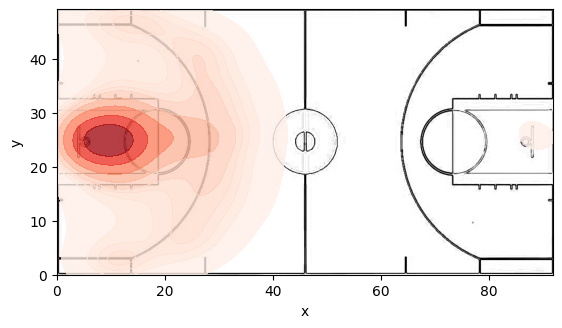

In [22]:
draw_on_court_both(shot_data) # zielone trafione, czerwone nietrafione, strzaly przeniesione na jedna strone

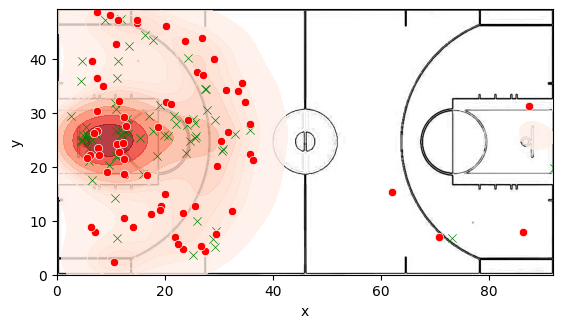

In [27]:
draw_on_court_both(shot_data, dots_num=70)

In [28]:
shot_data.columns

Index(['x', 'y', 'team', 'hit', 'pid', 'mid', 'value', 'distance',
       'en_distance', 'pl_pos', 'shot_clock'],
      dtype='object')

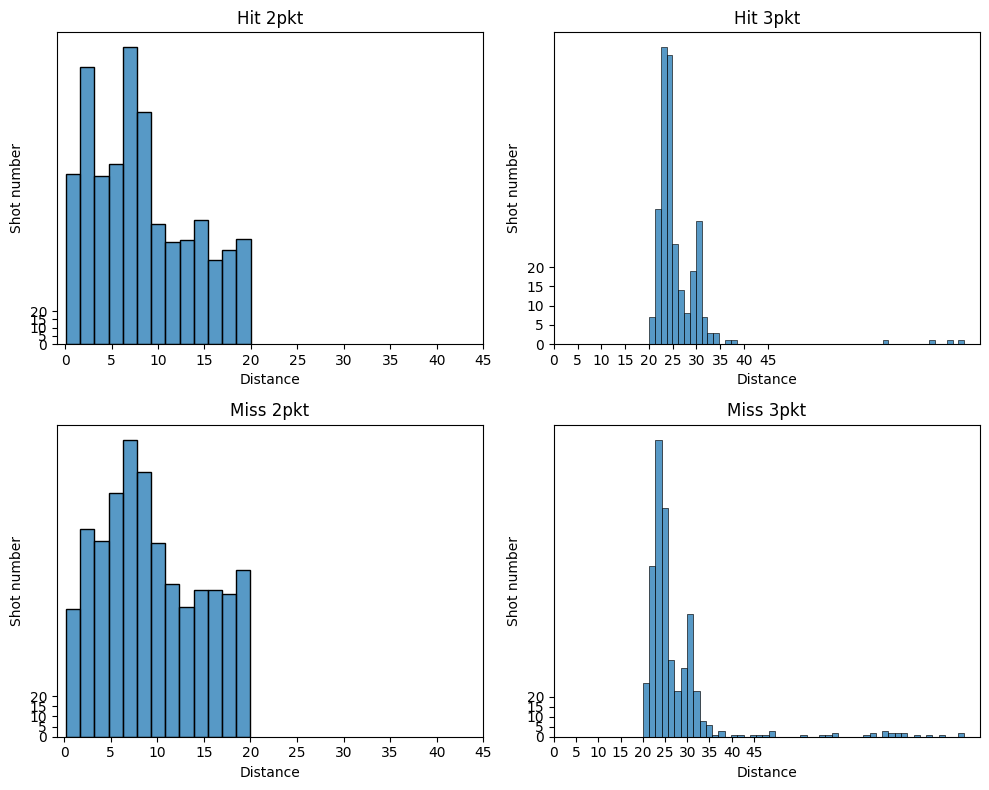

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
MAX_X = 50
X_RESOLUTION = 5
MAX_Y = 25
Y_RESOLUTION = 5

# Plot for hit=1 and value=2
sns.histplot(shot_data[(shot_data['hit'] == 1) & (shot_data['value'] == 2) & (shot_data['distance'] <= 20)], x="distance", ax=axes[0, 0])
axes[0, 0].set_title('Hit 2pkt')

# Plot for hit=1 and value=3
sns.histplot(shot_data[(shot_data['hit'] == 1) & (shot_data['value'] == 3) & (shot_data['distance'] >= 20)], x="distance", ax=axes[0, 1])
axes[0, 1].set_title('Hit 3pkt')

# Plot for hit=0 and value=2
sns.histplot(shot_data[(shot_data['hit'] == 0) & (shot_data['value'] == 2) & (shot_data['distance'] <= 20)], x="distance", ax=axes[1, 0])
axes[1, 0].set_title('Miss 2pkt')

# Plot for hit=0 and value=3
sns.histplot(shot_data[(shot_data['hit'] == 0) & (shot_data['value'] == 3) & (shot_data['distance'] >= 20)], x="distance", ax=axes[1, 1])
axes[1, 1].set_title('Miss 3pkt')

# Set common x and y axis labels
for ax in axes.flat:
    ax.set(xlabel='Distance', ylabel='Shot number')
    ax.set_xticks(list(range(0 ,MAX_X, X_RESOLUTION)))
    ax.set_xticklabels(list(range(0, MAX_X, X_RESOLUTION)))
    ax.set_yticks(list(range(0, MAX_Y, Y_RESOLUTION)))
    ax.set_yticklabels(list(range(0, MAX_Y, Y_RESOLUTION)))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## 2. Odległość od kosza a prawdopodobieństwo trafienia

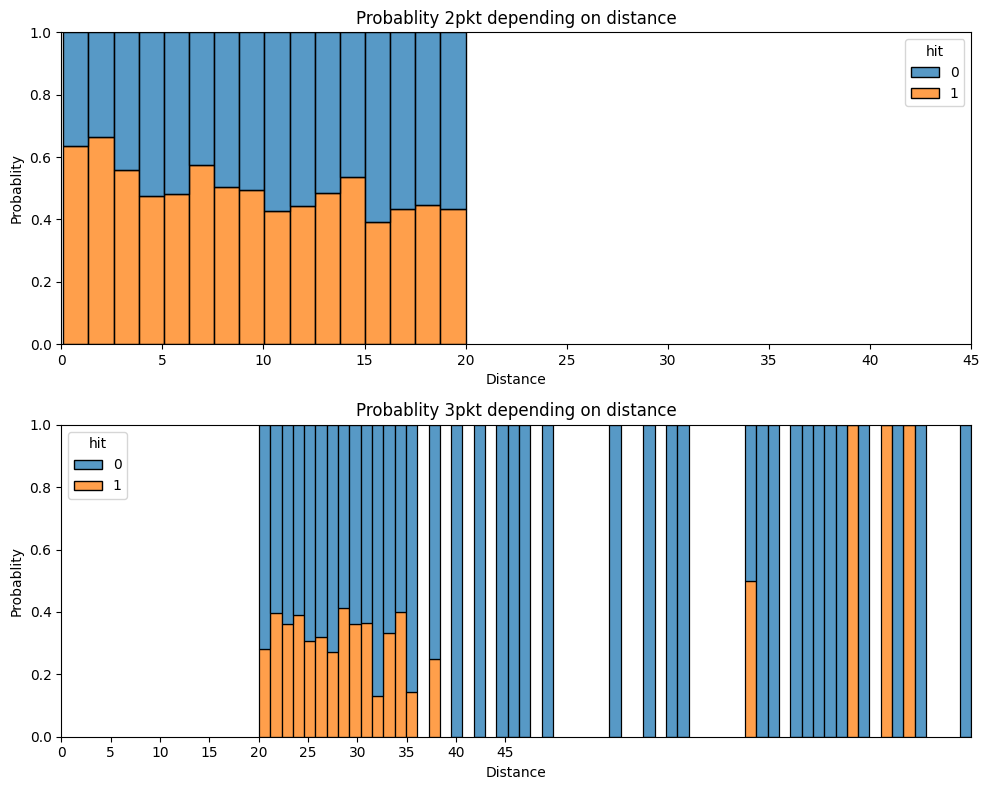

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
MAX_X = 50
X_RESOLUTION = 5

# Plot for hit=1 and value=2
sns.histplot(shot_data[(shot_data['value'] == 2) & (shot_data['distance'] <= 20)], x="distance", hue="hit", common_bins=True, stat="probability", multiple="fill", ax=axes[0])
axes[0].set_title('Probablity 2pkt depending on distance')

# Plot for hit=0 and value=3
sns.histplot(shot_data[(shot_data['value'] == 3) & (shot_data['distance'] >= 20)], x="distance", hue="hit", common_bins=True, stat="probability", multiple="fill", ax=axes[1])
axes[1].set_title('Probablity 3pkt depending on distance')

# Set common x and y axis labels
for ax in axes.flat:
    ax.set(xlabel='Distance', ylabel='Probablity')
    ax.set_xticks(list(range(0 ,MAX_X, X_RESOLUTION)))
    ax.set_xticklabels(list(range(0, MAX_X, X_RESOLUTION)))
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## 5. Szansa trafienia a odległość od najbliższego przeciwnika

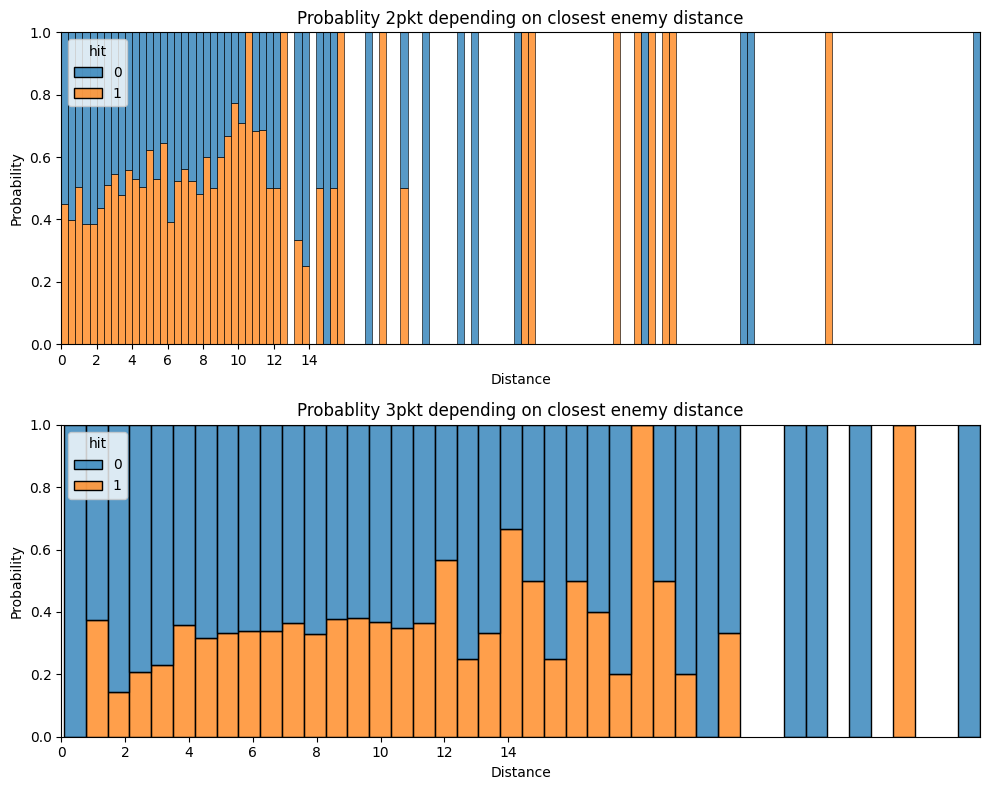

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
MAX_X = 16
X_RESOLUTION = 2

# Plot for hit=1 and value=2
sns.histplot(shot_data[(shot_data['value'] == 2)], x="en_distance", hue="hit", common_bins=True, stat="probability", multiple="fill", ax=axes[0])
axes[0].set_title('Probablity 2pkt depending on closest enemy distance')

# Plot for hit=0 and value=3
sns.histplot(shot_data[(shot_data['value'] == 3)], x="en_distance", hue="hit", common_bins=True, stat="probability", multiple="fill", ax=axes[1])
axes[1].set_title('Probablity 3pkt depending on closest enemy distance')

# Set common x and y axis labels
for ax in axes.flat:
    ax.set(xlabel='Distance', ylabel='Probability')
    ax.set_xticks(list(range(0 ,MAX_X, X_RESOLUTION)))
    ax.set_xticklabels(list(range(0, MAX_X, X_RESOLUTION)))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<Axes: xlabel='en_distance', ylabel='Probability'>

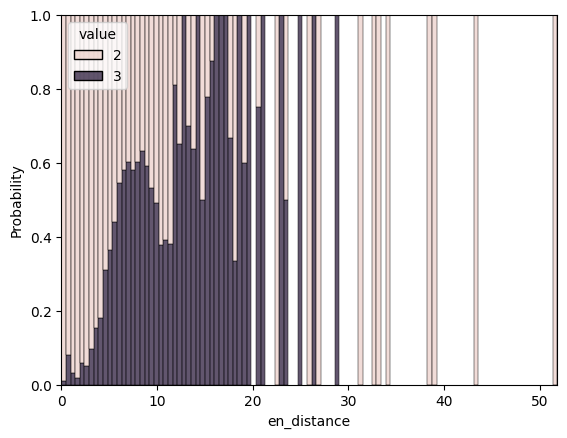

In [37]:
sns.histplot(shot_data, x="en_distance", hue="value", common_bins=True, stat="probability", multiple="fill")

## 4. Funkcja zawodnika a rzuty

POZYCJA F


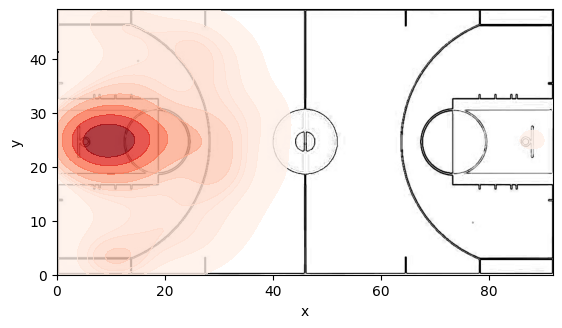

POZYCJA G


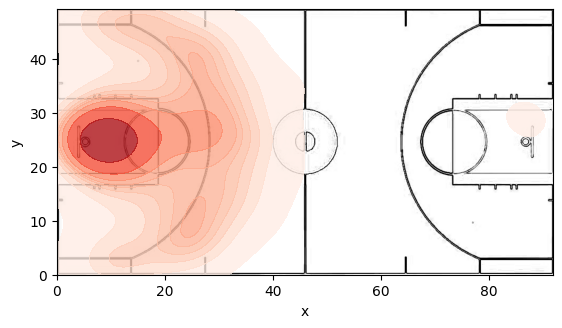

POZYCJA C


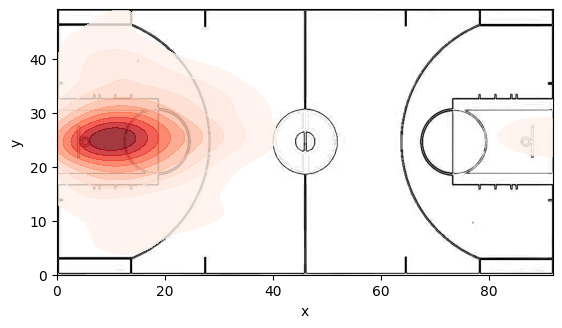

POZYCJA F-C


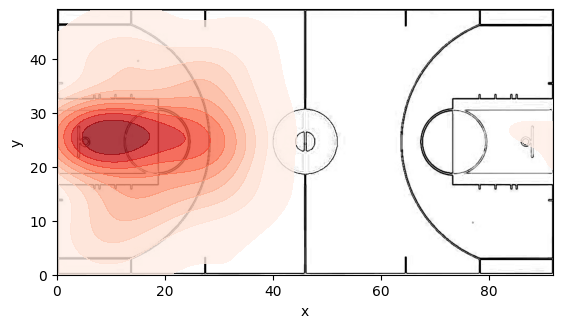

POZYCJA G-F


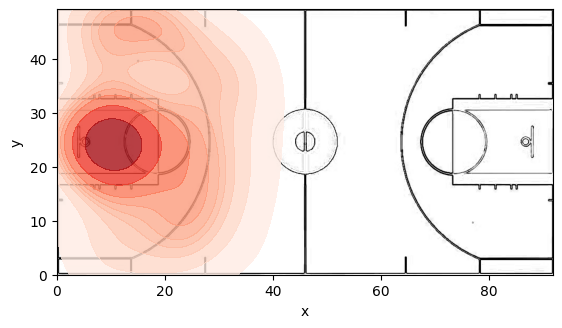

POZYCJA F-G


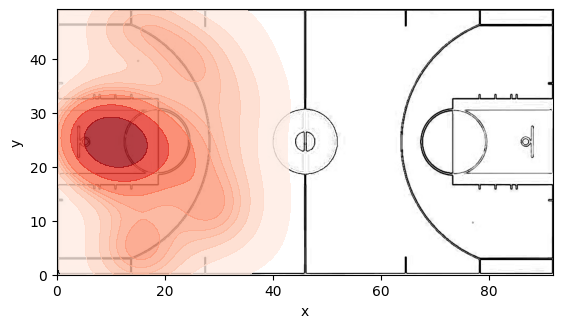

POZYCJA C-F


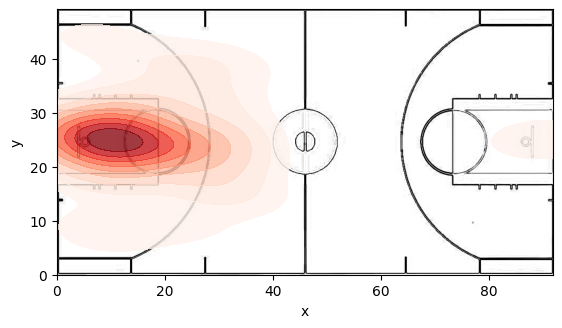

In [38]:
for pos in shot_data['pl_pos'].unique():
  print(f'POZYCJA {pos}')
  draw_on_court_both(shot_data[shot_data['pl_pos'] == pos])
  plt.show()

## 6. Czas na shot-clock a skąd wykonany rzut

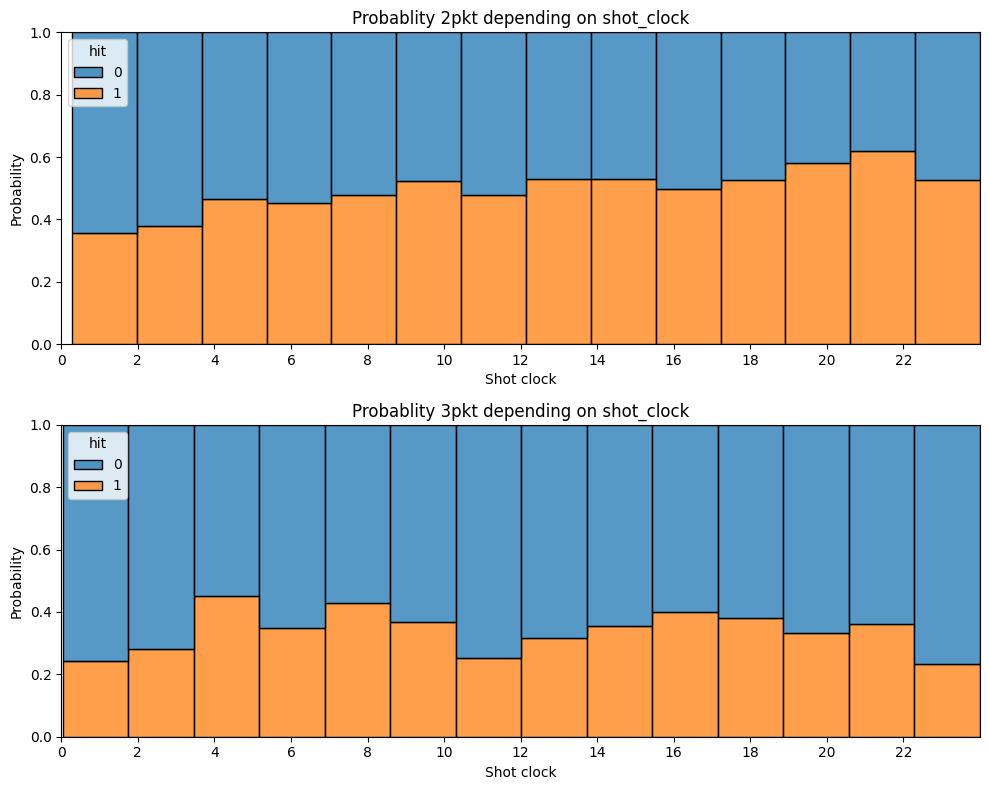

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
MAX_X = 24
X_RESOLUTION = 2

# Plot for hit=1 and value=2
sns.histplot(shot_data[(shot_data['value'] == 2)], x="shot_clock", hue="hit", common_bins=True, stat="probability", multiple="fill", ax=axes[0])
axes[0].set_title('Probablity 2pkt depending on shot_clock')

# Plot for hit=0 and value=3
sns.histplot(shot_data[(shot_data['value'] == 3)], x="shot_clock", hue="hit", common_bins=True, stat="probability", multiple="fill", ax=axes[1])
axes[1].set_title('Probablity 3pkt depending on shot_clock')

# Set common x and y axis labels
for ax in axes.flat:
    ax.set(xlabel='Shot clock', ylabel='Probability')
    ax.set_xticks(list(range(0 ,MAX_X, X_RESOLUTION)))
    ax.set_xticklabels(list(range(0, MAX_X, X_RESOLUTION)))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<Axes: xlabel='shot_clock', ylabel='distance'>

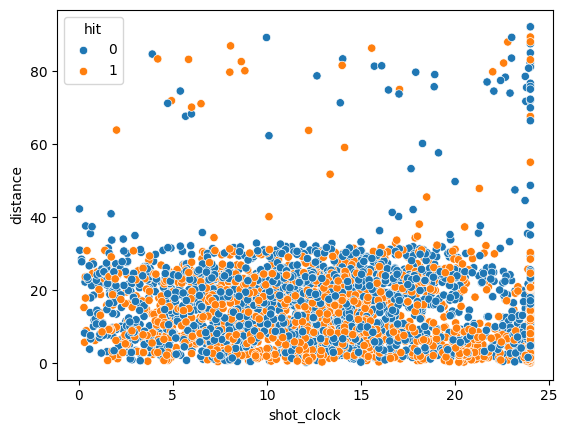

In [40]:
sns.scatterplot(shot_data, x='shot_clock', y='distance', hue="hit")

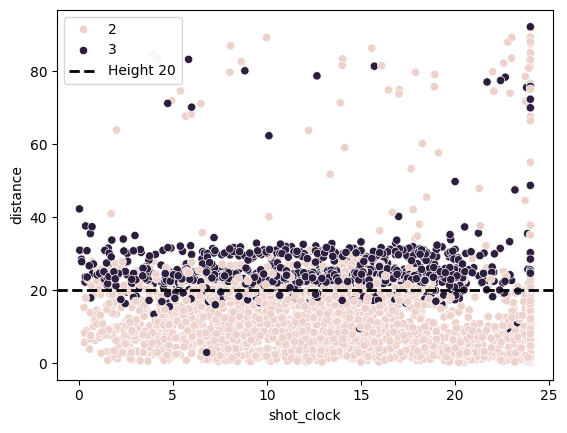

In [41]:
LONG_DISTANCE = 20 # do ustalenia kiedyś linia 3pkt
sns.scatterplot(data=shot_data, x='shot_clock', y='distance', hue="value")
plt.axhline(y=LONG_DISTANCE, color='black', linestyle='--', linewidth=2, label='Height 20')
plt.legend()
plt.show()

## Heatmapa pozycji atak/obrona

In [12]:
def draw_pf_histheat(dat):
  hist = sns.histplot(dat, x='x', y='y', binwidth=(3,3))
  for x in hist.collections:
    x.set_alpha(0.8)
  plt.imshow(c_img, zorder=0, extent=[0.0, 91.86, 0.0, 49.21])


In [13]:
hmdatas = []

for game in tqdm(game_list):
  players_seq_df, ball_seq_df = game.get_move_seq_dfs()
  home_id = game.game_series['team_home_id']
  merge_df = game.moment_df[['moment_id', 'play_time']]

  players_seq_df = pd.merge(players_seq_df, merge_df, how='left', on='moment_id')
  players_seq_df['team'] = players_seq_df['team_id'].apply(lambda x: HOME if x == home_id else VISITATOR)
  players_seq_df['timestamp'] = pd.to_timedelta(players_seq_df['play_time'], unit='s')
  players_seq_df['timestamp'] = pd.to_datetime('2016-01-01') + players_seq_df['timestamp'] #cokolwiek nie che mi sie brac z gry daty
  hmdata = players_seq_df.copy()
  hmdata['is_attacking'] = hmdata['attack_team'] != hmdata['team_id']
  condition = ~(hmdata['team'] == HOME) & (~hmdata['is_attacking'])
  hmdata[condition] = reverse_coordinates(hmdata[condition])

  condition = ~(hmdata['team'] == VISITATOR) & (hmdata['is_attacking'])
  hmdata[condition] = reverse_coordinates(hmdata[condition])
  hmdatas.append(hmdata)

100%|██████████| 23/23 [07:47<00:00, 20.32s/it]


In [42]:
hmdata = pd.concat(hmdatas, ignore_index=True)

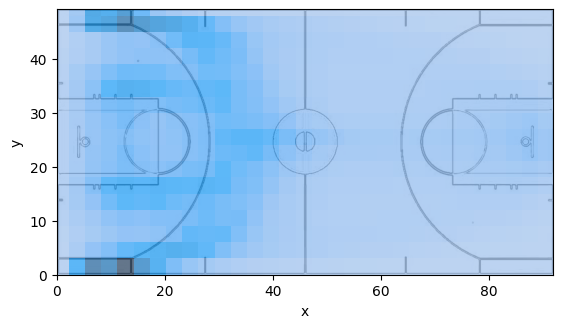

In [43]:
draw_pf_histheat(hmdata[hmdata['is_attacking'] == False])

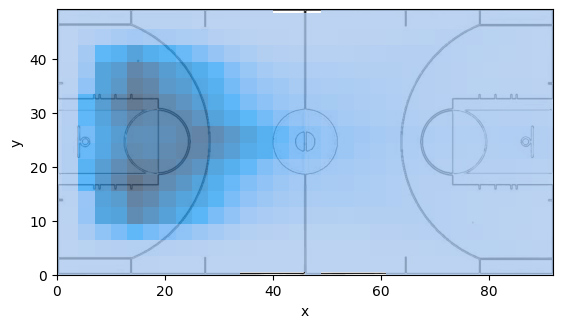

In [44]:
draw_pf_histheat(hmdata[hmdata['is_attacking'] == True])

## Zmęczenie zawodników

In [45]:
from shapely.geometry import Point

In [46]:
from datetime import datetime
datetime.fromtimestamp(1451695250.003)
hvplot_defaults = {'line_width':5, 'frame_height':500, 'frame_width':1000, 'colorbar':True, 'tiles':None, 'geo':False,}

In [47]:
"""__get_moment_ts_cache = {}

def get_moment_ts(mid):
  if mid in __get_moment_ts_cache:
    return __get_moment_ts_cache[mid]
  else:
    ret = datetime.fromtimestamp(float(game.moment_df[game.moment_df['moment_id'] == mid].iloc[0]['time_usa'])/1000.0)
    __get_moment_ts_cache[mid] = ret
    return ret"""

"__get_moment_ts_cache = {}\n\ndef get_moment_ts(mid):\n  if mid in __get_moment_ts_cache:\n    return __get_moment_ts_cache[mid]\n  else:\n    ret = datetime.fromtimestamp(float(game.moment_df[game.moment_df['moment_id'] == mid].iloc[0]['time_usa'])/1000.0)\n    __get_moment_ts_cache[mid] = ret\n    return ret"

In [48]:
gdfs = []
for game in tqdm(game_list):
  important_moves, _ = game.get_move_seq_dfs()
  merge_df_moment = game.moment_df[['moment_id', 'play_time']]
  game_id = game.game_id

  important_moves = pd.merge(important_moves, merge_df_moment, how='left', on='moment_id')
  important_moves['combined_id'] = important_moves['seq_id'].astype(str) + '_' + important_moves['player_id'].astype(str)
  merge_df = pd.DataFrame([[i, x] for i, x in enumerate(important_moves['combined_id'].unique())], columns=['traj_id', 'combined_id'])
  important_moves = pd.merge(important_moves, merge_df, how='left', on='combined_id')
  important_moves = important_moves.drop('combined_id', axis=1)
  important_moves['timestamp'] = pd.to_datetime('2016-01-01') + pd.to_timedelta(important_moves['play_time'], unit='s')
  CRS = None
  tc = mpd.TrajectoryCollection(important_moves, traj_id_col='traj_id', obj_id_col='player_id', t='timestamp', x='x', y='y', crs=CRS)
  generalized_tc = mpd.MinTimeDeltaGeneralizer(tc).generalize(tolerance=timedelta(seconds=1))
  generalized_tc.add_speed()
  generalized_tc.add_acceleration()
  gdf = generalized_tc.to_line_gdf()
  gdf['field_time_agg'] = (gdf['field_time'] // 60)
  gdf['total_field_time_agg'] = (gdf['total_field_time'] // 60)
  gdf['game_id'] = game_id
  gdfs.append(gdf)

100%|██████████| 23/23 [30:14<00:00, 78.87s/it] 


In [17]:
print("Kocham Sarę")

Kocham Sarę


In [49]:
gdf = pd.concat(gdfs, ignore_index=True)

In [ ]:
# trzeba odpalić dla jednej konkretnej gierki

game_id = 2150093
seq_id = 0
hv.extension('bokeh')
pitch_img = hv.RGB.load_image('court.png', bounds=(0,0, FIELD_LEN, FIELD_WIDTH))
pitch_img * generalized_tc.filter('seq_id', seq_id).filter('game_id', game_id).hvplot(**hvplot_defaults, c='speed')

In [66]:
b = gdf[gdf['speed']<20]

Współczynnik nachylenia (a): -0.016912449707762966
Punkt przecięcia osi Y (b): 5.897167913180156
Jedna minuta gry to -0.017 prędkości  mniej


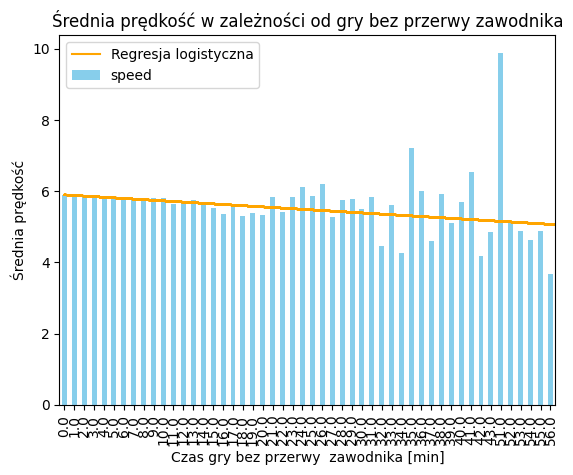

In [67]:

X = b[['field_time_agg']]
y = b['speed']
# Wygeneruj wykres słupkowy
ax = b.groupby('field_time_agg')['speed'].mean().plot(kind='bar', color='skyblue')

# Dodaj etykiety i tytuł
plt.xlabel('Czas gry bez przerwy  zawodnika [min]')
plt.ylabel('Średnia prędkość')
plt.title('Średnia prędkość w zależności od gry bez przerwy zawodnika')

model = LinearRegression()
model.fit(X, y)
print(f'Współczynnik nachylenia (a): {model.coef_[0]}')
print(f'Punkt przecięcia osi Y (b): {model.intercept_}')
print(f'Jedna minuta gry to {model.coef_[0]:.3f} prędkości  mniej')
predicted_y = model.predict(X)
ax.plot(X, predicted_y, color='orange', label='Regresja logistyczna')

# Wyświetl legendę
ax.legend()

# Wyświetl wykres
plt.show()

Współczynnik nachylenia (a): -0.009949439550951974
Punkt przecięcia osi Y (b): 6.459650518405696
Jedna minuta gry to -0.010 prędkości  mniej


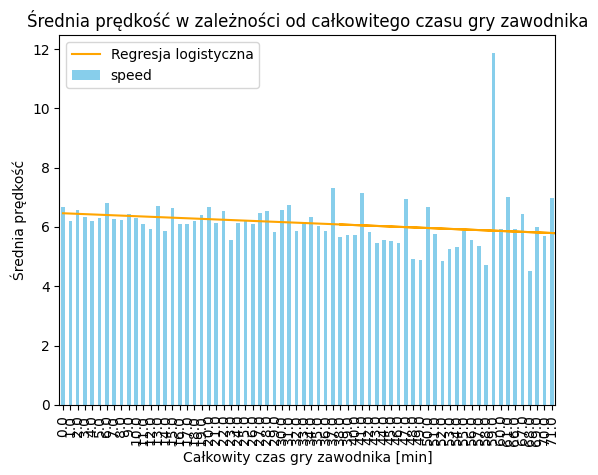

In [51]:
ax = gdf.groupby('total_field_time_agg')['speed'].mean().plot(kind='bar', color='skyblue')

# Dodaj etykiety i tytuł
plt.xlabel('Całkowity czas gry zawodnika [min]')
plt.ylabel('Średnia prędkość')
plt.title('Średnia prędkość w zależności od całkowitego czasu gry zawodnika')


X = gdf[['total_field_time_agg']]
y = gdf['speed']
model = LinearRegression()
model.fit(X, y)
print(f'Współczynnik nachylenia (a): {model.coef_[0]}')
print(f'Punkt przecięcia osi Y (b): {model.intercept_}')
print(f'Jedna minuta gry to {model.coef_[0]:.3f} prędkości  mniej')
predicted_y = model.predict(X)
ax.plot(X, predicted_y, color='orange', label='Regresja logistyczna')

# Wyświetl legendę
ax.legend()

# Wyświetl wykres
plt.show()

In [52]:
gdf_cleaner = gdf[gdf['acceleration'] < 25]
gdf_cleaner = gdf_cleaner[gdf_cleaner['acceleration'] >= 0]

Współczynnik nachylenia (a): -0.004932140081933569
Punkt przecięcia osi Y (b): 2.259139948567458
Jedna minuta gry to -0.005 prędkości przyśpiesznia


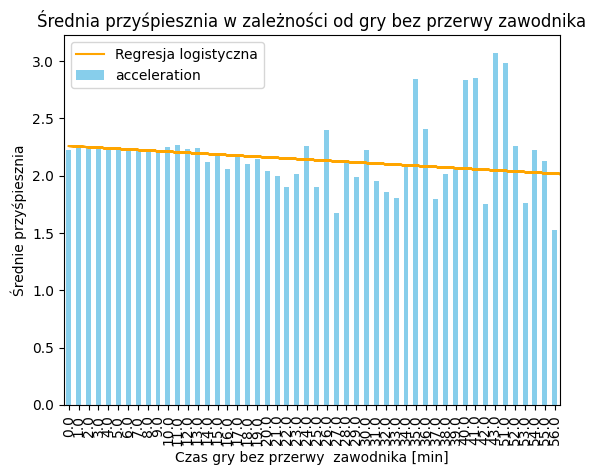

In [53]:
X = gdf_cleaner[['field_time_agg']]
y = gdf_cleaner['acceleration']
# Wygeneruj wykres słupkowy
ax = gdf_cleaner.groupby('field_time_agg')['acceleration'].mean().plot(kind='bar', color='skyblue')

# Dodaj etykiety i tytuł
plt.xlabel('Czas gry bez przerwy  zawodnika [min]')
plt.ylabel('Średnie przyśpiesznia')
plt.title('Średnia przyśpiesznia w zależności od gry bez przerwy zawodnika')

model = LinearRegression()
model.fit(X, y)
print(f'Współczynnik nachylenia (a): {model.coef_[0]}')
print(f'Punkt przecięcia osi Y (b): {model.intercept_}')
print(f'Jedna minuta gry to {model.coef_[0]:.3f} prędkości przyśpiesznia')
predicted_y = model.predict(X)
ax.plot(X, predicted_y, color='orange', label='Regresja logistyczna')

# Wyświetl legendę
ax.legend()

# Wyświetl wykres
plt.show()

Współczynnik nachylenia (a): -0.003910416599315441
Punkt przecięcia osi Y (b): 2.313338873244654
Jedna minuta gry to -0.004 przyśpiesznia  mniej


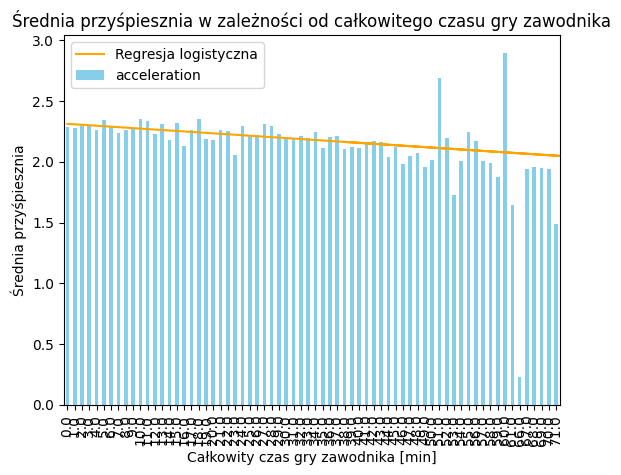

In [54]:
X = gdf_cleaner[['total_field_time_agg']]
y = gdf_cleaner['acceleration']

ax = gdf_cleaner.groupby('total_field_time_agg')['acceleration'].mean().plot(kind='bar', color='skyblue')

# Dodaj etykiety i tytuł
plt.xlabel('Całkowity czas gry zawodnika [min]')
plt.ylabel('Średnia przyśpiesznia')
plt.title('Średnia przyśpiesznia w zależności od całkowitego czasu gry zawodnika')

model = LinearRegression()
model.fit(X, y)
print(f'Współczynnik nachylenia (a): {model.coef_[0]}')
print(f'Punkt przecięcia osi Y (b): {model.intercept_}')
print(f'Jedna minuta gry to {model.coef_[0]:.3f} przyśpiesznia  mniej')
predicted_y = model.predict(X)
ax.plot(X, predicted_y, color='orange', label='Regresja logistyczna')

# Wyświetl legendę
ax.legend()

# Wyświetl wykres
plt.show()

In [61]:
a = gdf_cleaner[['position', 'speed', 'acceleration']]

# Prędkość a pozycja

<Axes: ylabel='speed'>

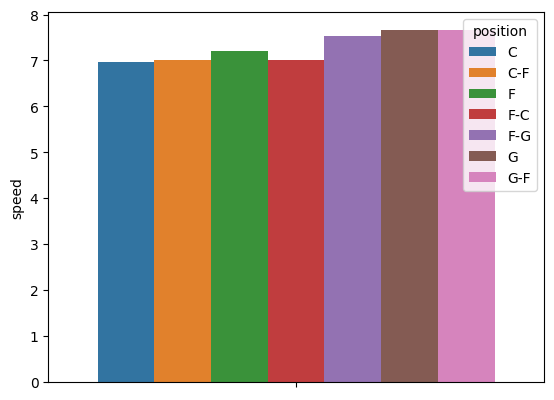

In [62]:
sns.barplot(a.groupby("position").mean().reset_index(), y="speed", hue='position')

<Axes: ylabel='acceleration'>

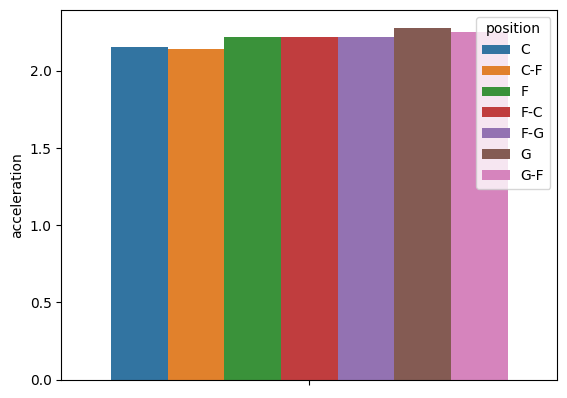

In [63]:
sns.barplot(a.groupby("position").mean().reset_index(), y="acceleration", hue='position')